Univariate Analysis: Know Thy Data!

In [2]:
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Reading Data: Most of the dataset we are using are comma-separated, meaning that it looks like a normal text file, but each value is separated by a comma, indicating which column (or variable, or attribute) the value belongs. Once you read the file as a dataframe, it looks MUCH cleaner.

Airbnb is read from a file on datasets that I chose to save in its own folder. Therefore, I need to specify the filepath IN QUOTES.
NOTE: WATCH THE DIRECTION OF YOUR SLASHES AND SPELLING/SPACES

Housing is simply saved in the same folder that this .ipynb file is saved, so all I need to do is write the file in quotes.
NOTE: Make sure to add .csv

In [4]:
Airbnb = pd.read_csv('G:/My Drive/BUSA 321 - Intro. to Business Analytics/Datasets/AB_NYC_2019.csv') 
Housing = pd.read_csv('HousingData.csv')

Shape: This shows how many rows and columns are in your dataframe. In other words: how many instances, subjects, people, etc., are you analyzing? How many variables do you have?

In [5]:
df.shape

(1338, 7)

KNOW THY DATA! Notice that not all of these variables are numerical. Some are categorical, meaning that the values are separated in different categories (male/female, yes/no, southwest/northeast, etc.)

The following function gives some basic statistics for the numerical variables. What do each mean? What does each tell you about the data? Get used to explaining this in your own words.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


How many values are in the bmi column? Specifically, how many are "non-missing"? NOTE: Missing data is a real problem in statistical analysis.

For all of the following, try these functions with some other columns as well! See what works, and what doesn't.

In [7]:
df.bmi.count()

1338

Notice how many ages are repeated in the dataset. Suppose you want to know how many specific ages, how many regions, etc., are included in the dataset? nunique gives the number of unique values.

In [8]:
df.age.nunique()

47

This gives you a list of the above, but it is not sorted. This function simply goes through the column and lists the first instance of each value (and not repeats)

In [9]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [10]:
df.sex.unique()

array(['female', 'male'], dtype=object)

KNOW THY DATA! Make sure you know how Python is reading each of your columns. What if you have sex or smoker listed as "1" or "2" to designate categories. Is this numerical? NO, it's categorical, but Python reads it as an integer. This may be useful sometimes, but know what you are working with beforehand!

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df.age.dtype

dtype('int64')

Is age numeric? True or false!

In [13]:
pd.api.types.is_numeric_dtype(df.age)

True

How many missing values are in each column? ("na")

In [14]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

FYI: This is Chapter 14, but just to show how a normal distribution works. Notice that the BMI is centered around the mean, and as BMI slowly deviates (like "standard deviation") from the average, there are less people with higher or lower BMI. Notice the number of people with specific BMI's are nicely "distributed" around the mean.

In real life, as you'll notice, much of our data is not normally distributed, even though SO MUCH statistical analysis relies on the data being normally distributed. In higher-level statistics, what do we do? We "transform" the data into a normal distribution, then do our analysis, THEN change it back. But that's for another time.

(array([ 13.,  17.,  47.,  80., 103., 131., 162., 157., 145., 143., 105.,
         90.,  54.,  42.,  20.,  12.,  10.,   4.,   1.,   2.]),
 array([15.96  , 17.8185, 19.677 , 21.5355, 23.394 , 25.2525, 27.111 ,
        28.9695, 30.828 , 32.6865, 34.545 , 36.4035, 38.262 , 40.1205,
        41.979 , 43.8375, 45.696 , 47.5545, 49.413 , 51.2715, 53.13  ]),
 <BarContainer object of 20 artists>)

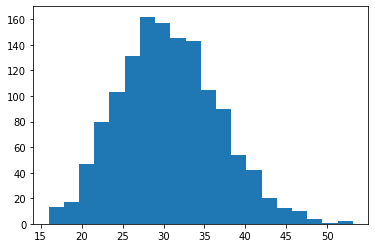

In [15]:
# Create histogram of a variable

from matplotlib import pyplot as plt
plt.hist(df.bmi, bins=20)

Maximum and Minimum of a column. Make sure to specify the column, or you may get an answer you're not quite looking for.

In [3]:
max(df.age)
min(df.age)

'smoker'

The quantile and median are different from mean and standard deviation. The quantile means that 25%, 50%, or 75% (depending on what you specify) of the observations are less than the given quantile.

In [27]:
df.age.quantile(.25)
df.age.quantile(.5)
df.age.quantile(.75)
df.age.median()

39.0

Mean is the same as average. You can specify a column or ask Python to give you the means for each NUMERICAL column.

In [5]:
df.age.mean()

39.20702541106129

In [30]:
df.mean()

C:\Users\jrw100\AppData\Local\Temp/ipykernel_16308/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

What if you want to find the mean of each ROW? Not very useful in this example, but suppose you wanted to find the average quiz grade for each student in a dataframe? Your book also gives an example where this is useful.

In [31]:
df.mean(axis='columns')

C:\Users\jrw100\AppData\Local\Temp/ipykernel_16308/1618129976.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis='columns')


0       4232.956000
1        444.580575
2       1128.365500
3       5510.043903
4        981.933800
           ...     
1333    2671.129575
1334     563.975200
1335     421.170875
1336     513.686250
1337    7307.857575
Length: 1338, dtype: float64

The mode is the most observed value in each column. 

In [7]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


There are numerous other functions you can use for columns and dataframes. 

In [11]:
df.count()
df.age.min()
df.age.max()


64

Standard Deviation is the how much your observations DEVIATE (or stray away) from the mean. 

68% of your data should be between 1 standard deviation before and after your mean.
95% of your data should be between 2 standard deviations before and after your mean.

Variance is simply std^2, and gives an idea of the spread of your data from the mean. 

These numbers are extremely useful when you're trying to see how well a model fits your data. (For example, for this dataset, ages range from 18 to 64, which means that a mean isn't too important. By the way, it's not normally distributed either--starting to see why the bell-curve is important?)

In [10]:
df.bmi.mean()
df.bmi.std()
df.bmi.var()

37.187883609773266

Here's how you can find the standard deviation for each numerical column.

In [44]:
df.std()

C:\Users\jrw100\AppData\Local\Temp/ipykernel_16308/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

Leading into visualization: notice how each of these columns gives a different shape:

Age doesn't have any real shape--it's just spread flatly across the graph
BMI is a nice, beautiful bell-curve (which would be nice if this were common)
Charges is extremely skewed and high close to zero (a different kind of distribution)

NOTE: Histograms show the number of observations at each age, BMI, or charge amount

<AxesSubplot:>

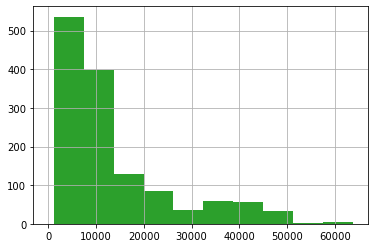

In [16]:
df.age.hist()
df.bmi.hist()
df.charges.hist()

If your data is extremely skewed or not much of a bell-curve, then much of your basic analysis isn't really important. For example, how helpful is finding mean, standard deviation, etc., for the charges, if it's so close to 0? Think about it.

Therefore, make sure skew and kurtosis are between -1 and 1 before doing anymore analysis. Otherwise, we will have to use some other ways of analyzing the data.

In [57]:
df.charges.skew()
df.charges.kurt()

1.6062986532967907